In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro
from scipy.stats import norm

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MB school/PCsNEW.csv', index_col=False)
print(data)

            Company                      TypeofPC            Store  Year(age)  \
0              ASUS                       Ноутбук           Мвидео         24   
1             APPLE                       Ноутбук           iStore         18   
2              Dell                 Настольный ПК  Цифровой формат         44   
3             Ardor                       Ноутбук              DNS         15   
4   Hewlett-Packard                 Настольный ПК        Эльдорадо         44   
5              DEXP                 Настольный ПК              DNS          5   
6               MSI                 Настольный ПК         Citilink         38   
7            Nvidea                 Настольный ПК     Онлайн Трейд          3   
8            Lenovo                       Ноутбук         re:Store         24   
9              Acer                 Настольный ПК      MediaMarket         44   
10              iRU                       Ноутбук         Ситилинк          7   
11         Gigabyte         

In [ ]:
Price = data['Price']
TypeofPCcode = data['TypeofPCcode']
print(Price)
print(TypeofPCcode)


0      39990
1      96880
2     100000
3      52999
4      60000
5      34299
6     120000
7      32000
8      70000
9      15000
10     94190
11    135990
12     42798
13     54499
14     20691
15    300000
16    138657
17     65000
18     40000
19     34990
20     15000
21     75000
Name: Price, dtype: int64
0     0
1     0
2     1
3     0
4     1
5     1
6     1
7     1
8     0
9     1
10    0
11    1
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    1
20    0
21    0
Name: TypeofPCcode, dtype: int64


In [ ]:
#Центральная тенденция
mode_value = Price.mode().iloc[0]
median_value = Price.median()
mean_value = Price.mean()

In [ ]:
print("Центральная тенденция (мода, медиана, средняя):")
print("Мода:", mode_value)
print("Медиана:", median_value)
print("Среднее значение:", mean_value)

Центральная тенденция (мода, медиана, средняя):
Мода: 15000
Медиана: 57249.5
Среднее значение: 74453.77272727272


Text(0, 0.5, 'Density')

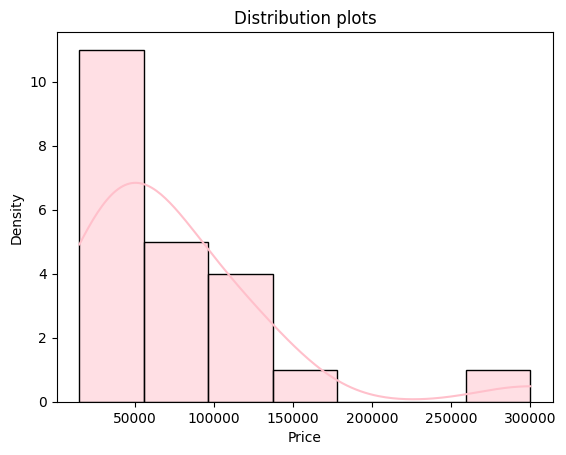

In [ ]:
sns.histplot(data['Price'], kde=True, color='pink')
plt.title("Distribution plots")
plt.xlabel('Price')
plt.ylabel('Density')


In [ ]:
#Показатели вариации
std_variation = Price.std()
coef_variance = (Price.std()-Price.mean()*100)
#Межквартальный размах
iqr = Price.quantile(0.75)/Price.quantile(0.25)
variance = Price.var()
data_range = Price.max() - Price.min()
minimum = Price.min()
maximum = Price.max()

print("Std. Deviation:", std_variation)
print("Coefficient of variation: ",coef_variance)
print("IQR: ", iqr,)
print("Variance: ",variance)
print("Range: ",data_range)
print("Minimum: ",minimum)
print("Maximum: ",maximum)

Std. Deviation: 62444.36118652754
Coefficient of variation:  -7382932.911540745
IQR:  2.65473233995585
Variance:  3899298243.993507
Range:  285000
Minimum:  15000
Maximum:  300000


In [ ]:
#Квантили
quantiles = Price.quantile([0.25, 0.5, 0.75])
print("Quantiles", quantiles)

Quantiles 0.25    36240.0
0.50    57249.5
0.75    96207.5
Name: Price, dtype: float64


In [ ]:
#Характеристики распределения
sc=np.random.normal(size=100)

# Вывод значений Skewness и Kurtosis
data_skew = skew(Price)
data_kurtosis = kurtosis(Price)


# Рассчет стандартной ошибки skewness и kurtosis
std_err_skew = np.sqrt(6/len(Price))
std_err_kurt = np.sqrt(24/len(Price))


# Рассчет теста Шапиро-Уилка
stat, pvalue = shapiro(Price)

print("Skewness:", data_skew)
print("Kurtosis:", data_kurtosis)

print("Std. Error of Skewness:", std_err_skew)
print("Std. Error of Kurtosis:", std_err_kurt)
print("Shapiro-Wilk:", stat)
print("P-value of Shapiro-Wilk:", pvalue)


Skewness: 2.2394848225874227
Kurtosis: 5.761016463822212
Std. Error of Skewness: 0.5222329678670935
Std. Error of Kurtosis: 1.044465935734187
Shapiro-Wilk: 0.7651315927505493
P-value of Shapiro-Wilk: 0.00014947683666832745


In [ ]:
#Эксцесс
mean = np.mean(Price)
std_dev = np.std(Price)

# Вычисляем показатель эксцесса
excess = np.mean(((Price - mean) / std_dev) ** 4) - 3

print("Показатель эксцесса:", excess)

Показатель эксцесса: 5.761016463822209


In [ ]:
print(data['TypeofPCcode'])


0     0
1     0
2     1
3     0
4     1
5     1
6     1
7     1
8     0
9     1
10    0
11    1
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    1
20    0
21    0
Name: TypeofPCcode, dtype: int64


<Figure size 1000x600 with 0 Axes>

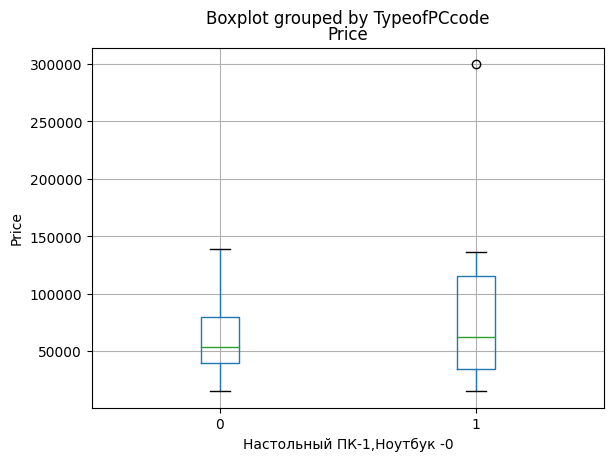

In [ ]:
# График Boxplot Price
plt.figure(figsize=(10, 6))
data.boxplot(by='TypeofPCcode', column='Price')
plt.xlabel("Настольный ПК-1,Ноутбук -0")
plt.ylabel("Price")
plt.show()

<Figure size 1000x600 with 0 Axes>

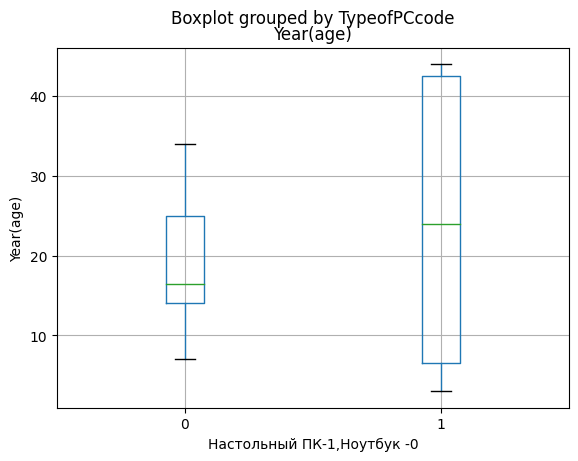

In [ ]:
# График Boxplot Year(age)
Year = data['Year(age)']
plt.figure(figsize=(10, 6))
data.boxplot(by='TypeofPCcode', column='Year(age)')
plt.xlabel("Настольный ПК-1,Ноутбук -0")
plt.ylabel("Year(age)")
plt.show()

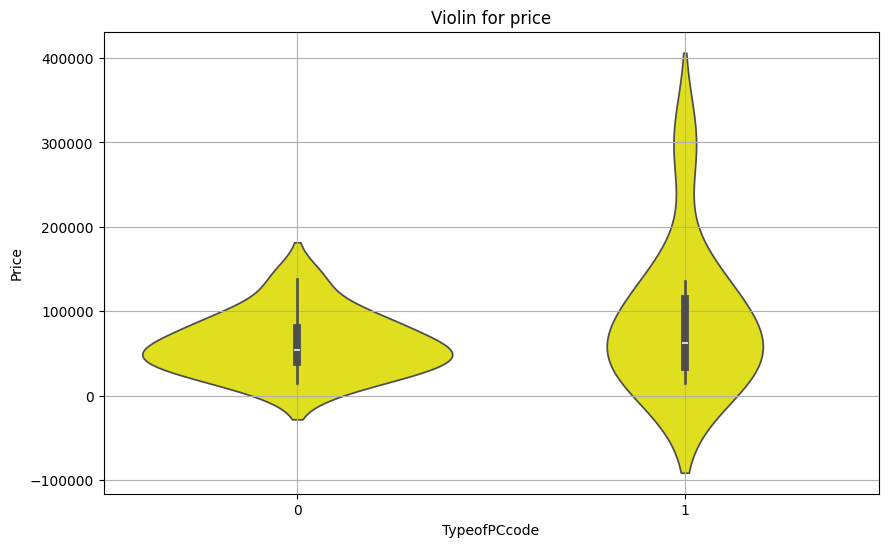

In [ ]:
# График swarmplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='TypeofPCcode',y='Price', data=data, color='yellow')
plt.title('Violin for price')
plt.xlabel('TypeofPCcode')
plt.ylabel('Price')
plt.grid()
plt.show()

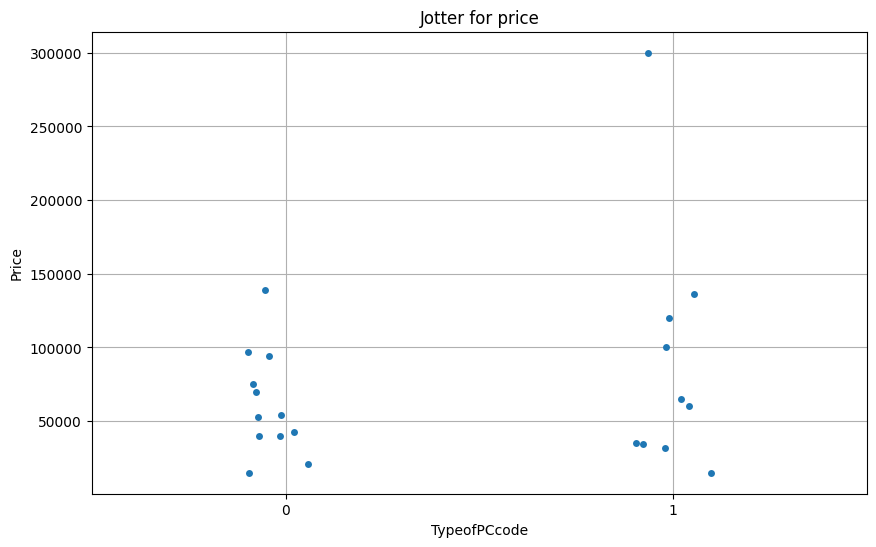

In [ ]:
# График swarmplot Price
plt.figure(figsize=(10, 6))

sns.stripplot(x='TypeofPCcode',y='Price', data=data, jitter=True)
plt.title('Jotter for price')
plt.xlabel('TypeofPCcode')
plt.ylabel('Price')
plt.grid()
plt.show()

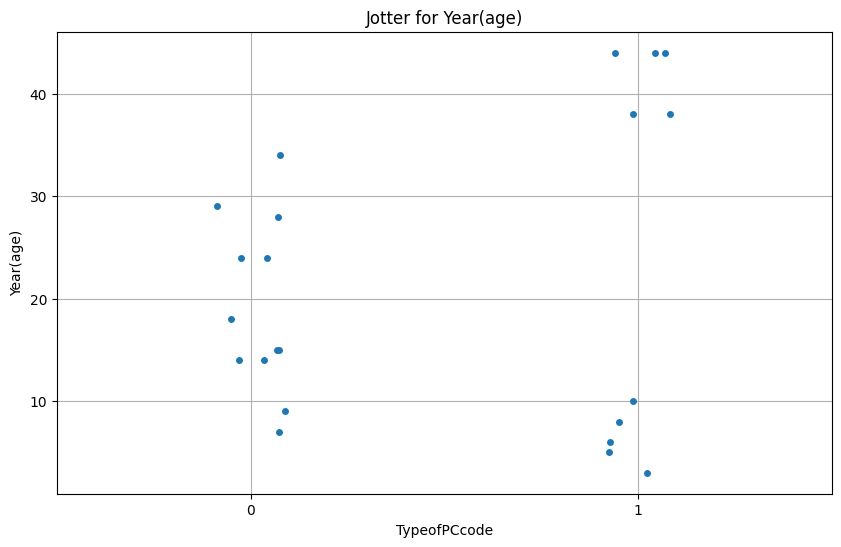

In [ ]:
# График swarmplot Year(age)
plt.figure(figsize=(10, 6))

sns.stripplot(x='TypeofPCcode',y='Year(age)', data=data, jitter=True)
plt.title('Jotter for Year(age)')
plt.xlabel('TypeofPCcode')
plt.ylabel('Year(age)')
plt.grid()
plt.show()

In [ ]:
#Корреляция между переменными Price
mean_X = np.mean(TypeofPCcode)
mean_Y = np.mean(Price)

# Вычисляем линейный коэффициент корреляции
numerator = np.sum((TypeofPCcode - mean_X) * (Price - mean_Y))
denominator = np.sqrt(np.sum((TypeofPCcode - mean_X)**2) * np.sum((Price - mean_Y)**2))
correlation_coefficient = numerator / denominator

print("Линейный коэффициент корреляции r(xy):", correlation_coefficient)

Линейный коэффициент корреляции r(xy): 0.22854632801961655


In [ ]:
#Корреляция между переменными Year(age)
mean_X = np.mean(TypeofPCcode)
mean_Y = np.mean(Year)

# Вычисляем линейный коэффициент корреляции
numerator = np.sum((TypeofPCcode - mean_X) * (Year - mean_Y))
denominator = np.sqrt(np.sum((TypeofPCcode - mean_X)**2) * np.sum((Year - mean_Y)**2))
correlation_coefficient = numerator / denominator

print("Линейный коэффициент корреляции r(xy):", correlation_coefficient)

Линейный коэффициент корреляции r(xy): 0.1737769342528026


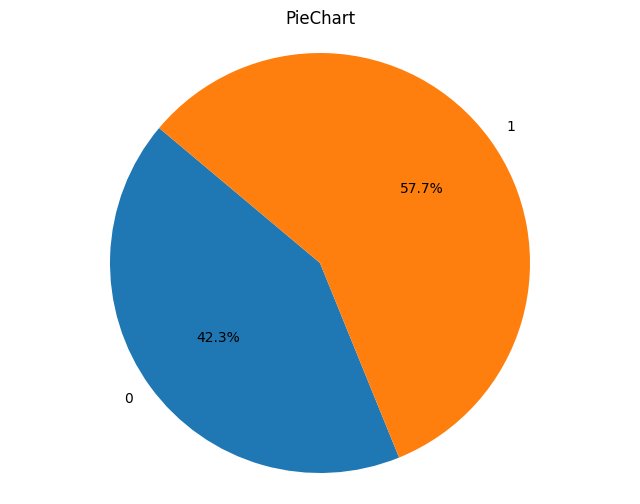

In [ ]:
#Диаграмма PieChart(секторная диаграмма)
data = {"Price":[39990, 96880,100000,52999,60000,34299,120000,32000,70000,15000, 94190, 135990,90000,54499,20691,300000,138657,65000,40000,34990,15000,75000],
        "TypeofPCcode" :[0,0,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0]}

df = pd.DataFrame(data)
mean_prices = df.groupby('TypeofPCcode')['Price'].mean()

plt.figure(figsize=(8,6))
plt.pie(mean_prices, labels=mean_prices.index, autopct='%1.1f%%', startangle=140)
plt.title('PieChart')
plt.axis('equal')
plt.show()

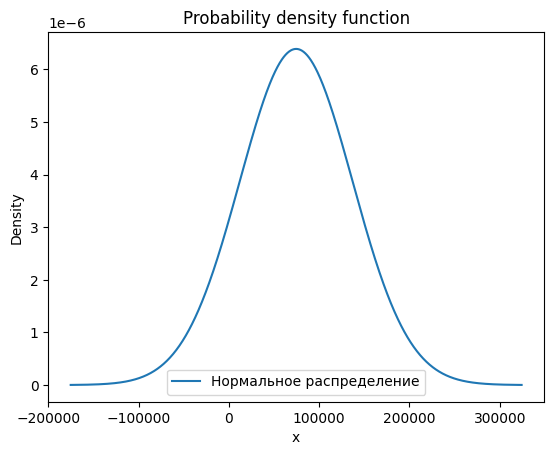

In [ ]:
#График плотности теоретического нормального распределения
stdv = 74453
sigma = 62444
x = np.linspace(stdv - 4*sigma, stdv + 4*sigma, 1000)

density = norm.pdf(x, stdv, sigma)
plt.plot(x, density, label='Нормальное распределение')
plt.title('Probability density function')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
!pip install sklearn
from sklearn.neighbors import KernelDensity

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


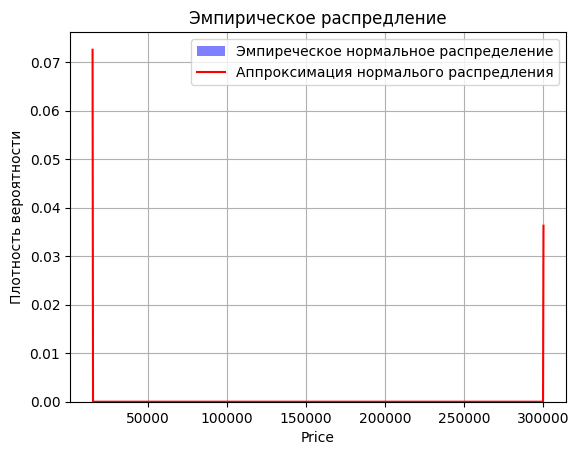

In [ ]:
plt.hist(Price, bins=30, density=True, alpha=0.5, color='blue', label='Эмпиреческое нормальное распределение')
data_array = Price.values.reshape(-1,1)
kde = KernelDensity(kernel="gaussian", bandwidth= 0.5).fit(data_array)
x=np.linspace(min(Price), max(Price), 1000)
log_density=kde.score_samples(x.reshape(-1,1))
density= np.exp(log_density)
plt.plot(x,density,color='red', label='Аппроксимация нормалього распредления')
plt.title('Эмпирическое распредление')
plt.xlabel('Price')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

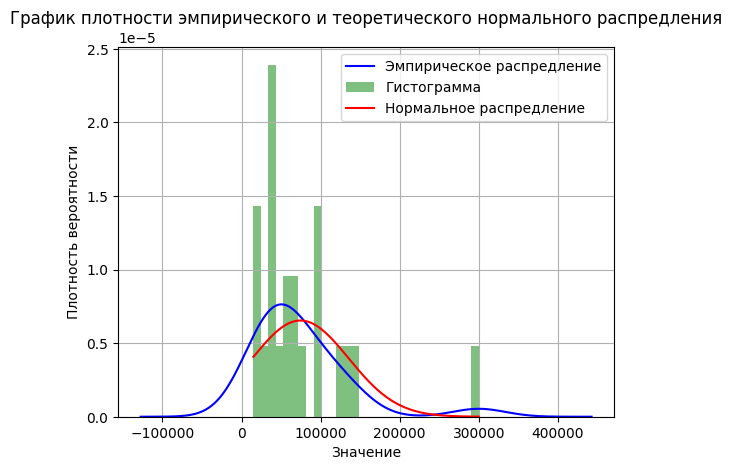

In [ ]:
data_series = pd.Series(Price)
data_series.plot(kind='density', color='blue', label='Эмпирическое распредление')
data_series.plot(kind='hist', bins=30, density=True, alpha=0.5, color='green', label='Гистограмма')
x = np.linspace(min(Price), max(Price),500)
density= norm.pdf(x, np.mean(Price), np.std(Price))
plt.plot(x, density, color='red', label='Нормальное распредление')
plt.title('График плотности эмпирического и теоретического нормального распредления')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

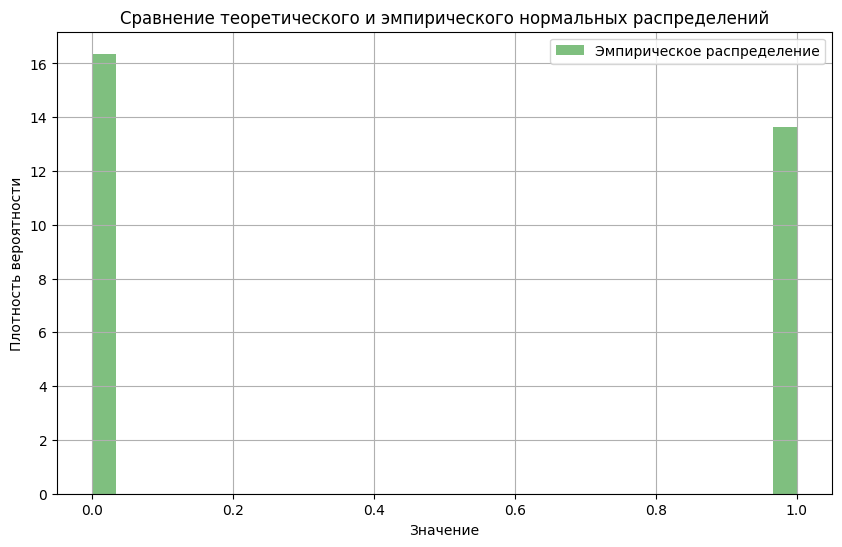

In [ ]:
#График плотность эмпирического нормального распределения (но тут какой то бред как будто надо передлать)
stdv = 74453
sigma = 62444
x_empirical = np.linspace(min(TypeofPCcode), max(TypeofPCcode), 1000)
emperical = norm.pdf(x_empirical, stdv, sigma)
plt.figure(figsize=(10, 6))
plt.hist(TypeofPCcode, bins=30, density=True, alpha=0.5, label='Эмпирическое распределение', color='green')
plt.title('Сравнение теоретического и эмпирического нормальных распределений')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.grid(True)
plt.show()

Text(0, 0.5, 'Counts')

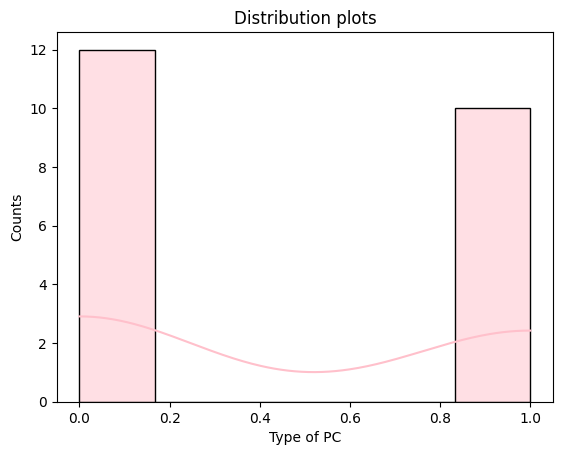

In [ ]:
sns.histplot(data['TypeofPCcode'], kde=True, color='pink')
plt.title("Distribution plots")
plt.xlabel('Type of PC')
plt.ylabel('Counts')

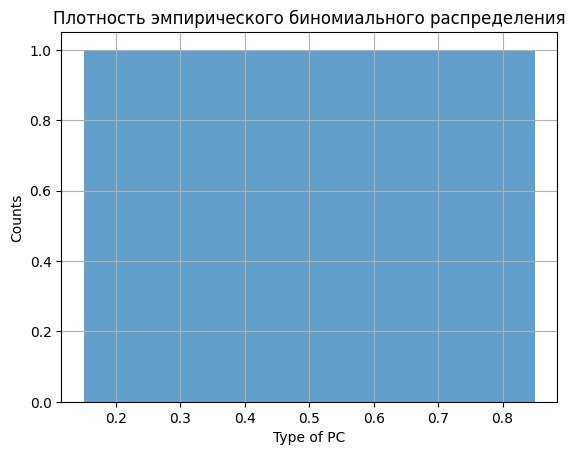

In [ ]:
#График плотность эмпирического биномиального распределения - относительная частота значений качественного признака
bin_width = 1
bins = np.arange(min(data['TypeofPCcode']), max(data['TypeofPCcode']) + bin_width, bin_width)  # Границы бинов
counts, _ = np.histogram(data['TypeofPCcode'], bins=bins, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.bar(bin_centers, counts, width=bin_width * 0.7, align='center', alpha=0.7)
plt.xlabel('Type of PC')
plt.ylabel('Counts')
plt.title('Плотность эмпирического биномиального распределения')
plt.grid(True)
plt.show()